In [1]:
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install accelerate

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/244.2 kB ? eta -:--:--
     -                                        10.2/244.2 kB ? eta -:--:--
     -                                        10.2/244.2 kB ? eta -:--:--
     ----                                  30.7/244.2 kB 217.9 kB/s eta 0:00:01
     ----                                  30.7/244.2 kB 217.9 kB/s eta 0:00:01
     ------                                41.0/244.2 kB 178.6 kB/s eta 0:00:02
     ---------                             61.4/244.2 kB 217.9 kB/s eta 0:00:01
     ---------                             61.4/244.2 kB 217.9 kB/s eta 0:00:01
     ------------                          81.9/244.2 kB 208.4 kB/s eta 0:00:01
     ------------                          81.9/244.2 kB 208.4 kB/s eta 0:00:01
     ------------                          81.9/244.2 kB 208.4 kB/s eta 0:00:01
     -------------                         92.2/244.2 kB 180.

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    torch>=1.10.0 from https://files.pythonhosted.org/packages/d0/c8/f0dc8642e3ce0a3ae5f05e5149ab9df5375d569294f7be9a1ab1d95a1d76/torch-2.0.1-cp311-cp311-win_amd64.whl (from accelerate):
        Expected sha256 dbd68cbd1cd9da32fe5d294dd3411509b3d841baecb780b38b3b7b06c7754434
             Got        f2922b2abe7470d5ead249c222d97f18e1c9b3ba310240855eb4f47df88ceeb5


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'torch'

In [4]:
def get_translation(text,dest_lang):
  translator = Translator()
  translated_text = translator.translate(text, dest=dest_lang)
  return translated_text.text

In [5]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (900,900)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt3"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [6]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

vae/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


In [7]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

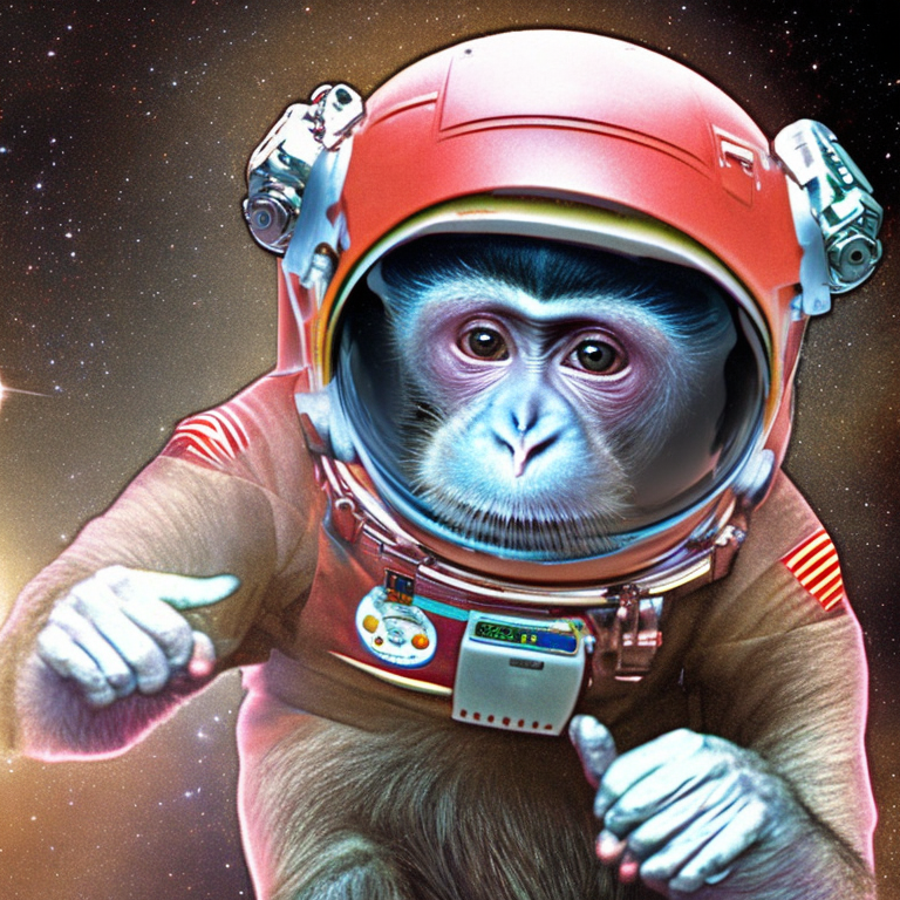

In [8]:
translation = get_translation("monkey in space","en")
generate_image(translation, image_gen_model)

In [15]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
import torch
torch.cuda.empty_cache()

In [19]:
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

prompt = translation
video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = export_to_video(video_frames)

  0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
video_path

'/tmp/tmpyj53ojbn.mp4'

In [21]:
from google.colab import files
files.download(video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>